In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

def load_img_gray():
    img=cv.imread('poker.png',0)
    return img

def load_img_gray_f32():
    img=cv.imread('poker.png',1)
    img=cv.cvtColor(img,cv.COLOR_GRAY2BGR).astype(np.float32)/255
    return img

def load_img_color():
    img=cv.imread('poker.png',1)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    return img

def display_img(img,cmap=None):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img)


In [2]:
def original_i(img):
    img=load_img_color()
    display_img(img)
#HARIS EDGE DETECTION:::::

def haris_detection(img):
    imgg=load_img_gray()
    imgc=load_img_color()
    dist= cv.cornerHarris(src=imgg,blockSize=2,ksize=3,k=0.04)
    dist=cv.dilate(dist,None)
    imgc[dist>0.01*dist.max()]=[255,0,0]
    plt.imshow(imgc)

#CANNY EDG DETECTION::::

def canny_dtection(img):
    img_canny=load_img_color()
    med_val=np.median(img_canny)
    lower=int(max(0,0.7*med_val))
    #lower thresh1 to either 0 or 70% of med val whatever is greater
    upper=int(min(255,1.3*med_val))
    #upper thresh2 to either 255 or 130% of med val whatever is smaller
    #BECAUSE IT IS A LARGE IMG WE BLURING FIRST

    blurr_img=cv.blur(img_canny,ksize=(6,6))
    edges=cv.Canny(blurr_img,threshold1=lower,threshold2=upper-800)
    plt.imshow(edges)

def ex_contour_detection(img):
    img_con=load_img_gray()
    img,contours,hierarchy=cv.findContours(img_con,cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)
    external_contours=np.zeros(img.shape)
    for i in range(len(contours)):
    
        if hierarchy[0][i][3]==10:
        
            cv.drawContours(external_contours,contours,i,255,10)
    plt.imshow(external_contours,cmap='gray')

def in_contour_detection(img):
    img_con=load_img_gray()
    img,contours,hierarchy=cv.findContours(img_con,cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)
    internal_contours=np.zeros(img.shape)
    internal_contours=np.zeros(img.shape)
    for i in range(len(contours)):
    
        if hierarchy[0][i][3]!=10:
        
            cv.drawContours(internal_contours,contours,i,255,10)
    plt.imshow(internal_contours,cmap='gray')

GridspecLayout(children=(Button(button_style='warning', description='haris_detection', layout=Layout(grid_area…

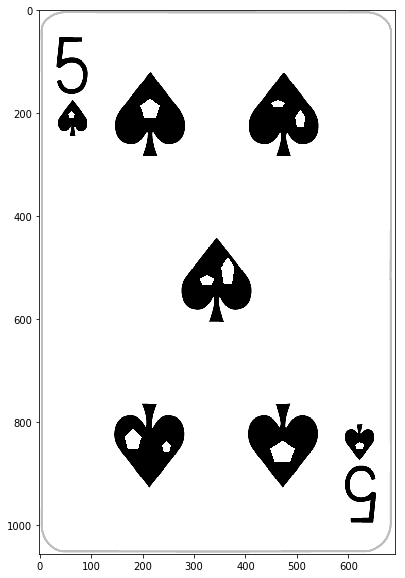

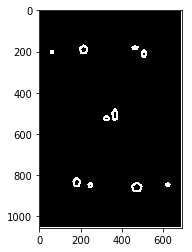

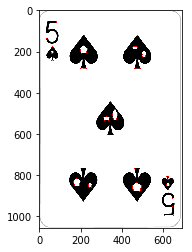

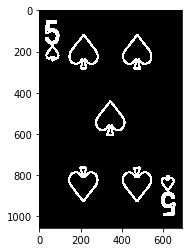

In [3]:
#BUTTONS FOR FUNCTIONS:::

import ipywidgets as ipw
from IPython.display import display
from ipywidgets import GridspecLayout
from ipywidgets import TwoByTwoLayout
from ipywidgets import Button, Layout, jslink, IntText, IntSlider
#----------------------------------------------------------------------------------
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

grid1= GridspecLayout(2, 3, height='160px')
grid1[0, 0] = create_expanded_button('Flip', 'info')
grid1[0, 2] = create_expanded_button('Rotation 180', 'warning')

grid1[1, 0] = create_expanded_button('Rotation 270', 'warning')
grid1[1, 2] = create_expanded_button('Negative', 'danger')

#------------------------------------------------------------------------------
grid1[0, 0]=ipw.Button(
    description='haris_detection',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[0,0].on_click(haris_detection)

grid1[0, 2]=ipw.Button(
        description='canny_dtection',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[0,2].on_click(canny_dtection)



grid1[1, 0]=ipw.Button(
    description='ex_contour_detection',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[1,0].on_click(ex_contour_detection)

grid1[1, 2]=ipw.Button(
    description='in_contour_detection',
    height='180px',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[1,2].on_click(in_contour_detection)

grid1[1, 1]=ipw.Button(
    description='Original Img',
    height='180px',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[1,1].on_click(original_i)


display(grid1)